<a href="https://colab.research.google.com/github/esn73/lab_python/blob/master/py22_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips 데이터 셋

In [3]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Box plot

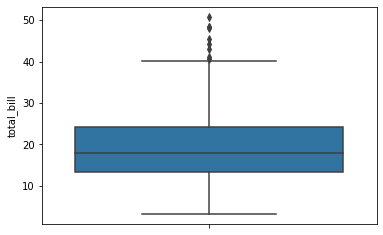

In [20]:
# total_bill box plot
sns.boxplot(y='total_bill', data=tips)
plt.show()

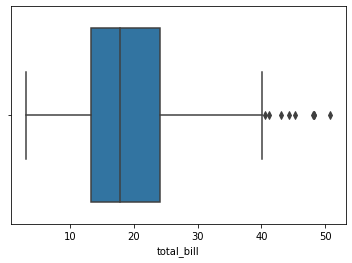

In [21]:
sns.boxplot(x='total_bill', data=tips)
plt.show()

성별 tip의 분포 시각화

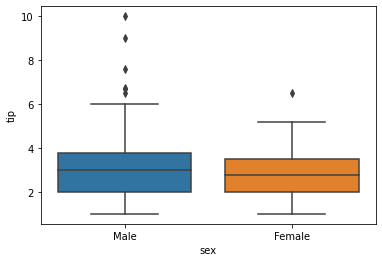

In [22]:
sns.boxplot(y='tip', data=tips, x='sex')
plt.show()

In [23]:
tip_male = tips[tips['sex'] == 'Male']
tip_male['tip'].describe()

count    157.000000
mean       3.089618
std        1.489102
min        1.000000
25%        2.000000
50%        3.000000
75%        3.760000
max       10.000000
Name: tip, dtype: float64

In [24]:
tip_Female = tips[tips['sex'] == 'Female']
tip_Female['tip'].describe()

count    87.000000
mean      2.833448
std       1.159495
min       1.000000
25%       2.000000
50%       2.750000
75%       3.500000
max       6.500000
Name: tip, dtype: float64

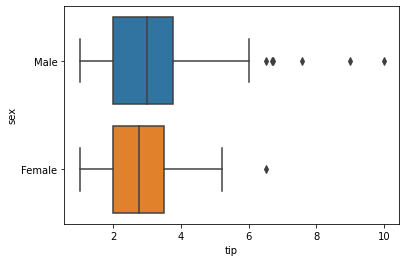

In [25]:
sns.boxplot(x='tip', y='sex', data=tips)
plt.show()

요일별 tip의 box plot

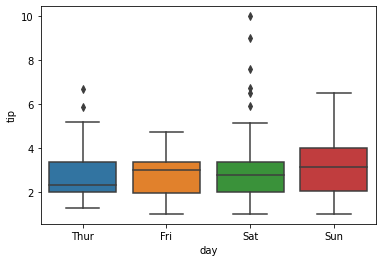

In [27]:
sns.boxplot(x='day', y='tip', data=tips)
plt.show()

* subplot 2개(1x2)를 생성
* 흡연여부별, 시간별 boxplot

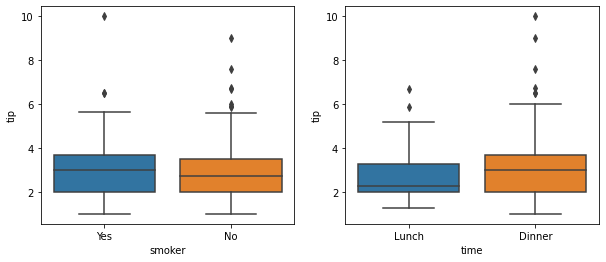

In [36]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4)) ## pyplot을 사용해야함

sns.boxplot(x='smoker', y='tip', data=tips, ax=ax[0])
sns.boxplot(x='time', y='tip', data=tips, ax=ax[1])

plt.show()

# Histogram

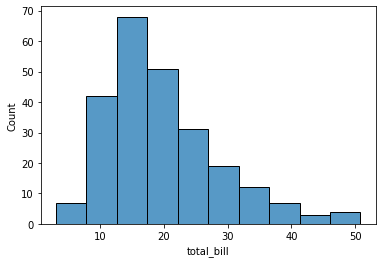

In [38]:
# total_bill histogram 
sns.histplot(data=tips, x='total_bill', bins=10) # 자동으로 y축 개수(count)로 잡음
plt.show()

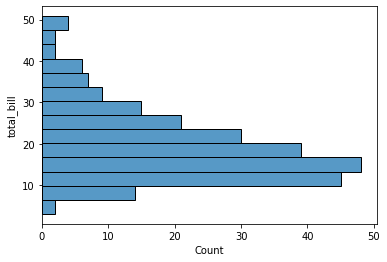

In [40]:
sns.histplot(data=tips, y='total_bill')
plt.show()

# Bar plot

## `countplot()`

카테고리 타입 변수의 빈도수(count)를 막대로 표현한 그래프

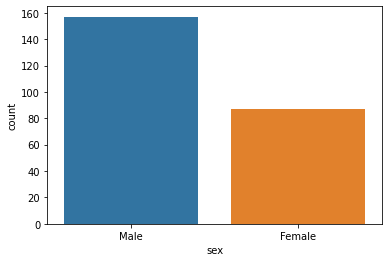

In [43]:
# 남성/여성 수 - 세로 막대 그래프
sns.countplot(data=tips, x='sex')
plt.show()

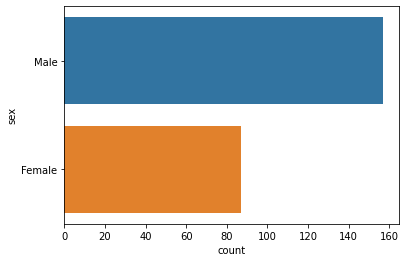

In [44]:
sns.countplot(data=tips, y='sex')
plt.show()

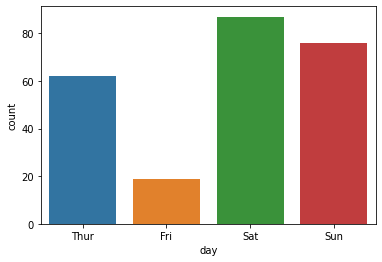

In [48]:
# 요일의 빈도수
sns.countplot(x='day', data=tips)
plt.show()

In [52]:
# 요일별 성별 빈도수
tips.groupby(by=['day', 'sex'])['tip'].count()

day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: tip, dtype: int64

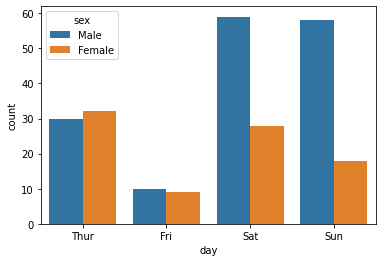

In [54]:
sns.countplot(x='day', hue='sex', data=tips) 
#> hue=채우기 색상. 막대를 채우는 색상을 '성별'에 따라서 다르게 함.
plt.show()

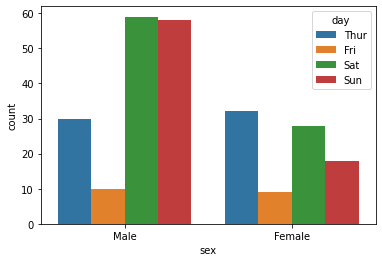

In [56]:
sns.countplot(x='sex', hue='day', data=tips)
plt.show()

In [57]:
# 성별, 흡연여부 빈도수
tips.groupby(by=['sex', 'smoker'])['tip'].count()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: tip, dtype: int64

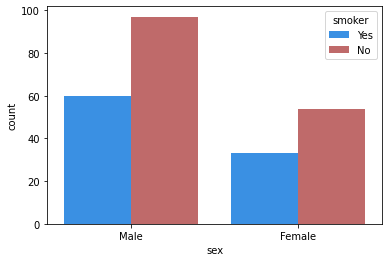

In [78]:
sns.countplot(x='sex', hue='smoker', data=tips, palette=['dodgerblue', 'indianred'])
plt.show()

## `barplot()`

* 그룹별 변수(컬럼)의 통계량(예: 평균, 중앙값, ...)을 막대로 시각화
* 카테고리 타입 변수와 연속형 변수를 함께 시각화

In [66]:
# 성별 tip의 평균
tips.groupby(by='sex')['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

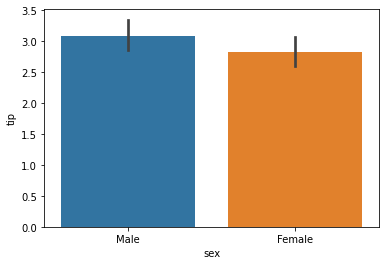

In [67]:
sns.barplot(x='sex', y='tip', data=tips) # estimator=np.mean -> 막대의 높이는 평균값.
plt.show()

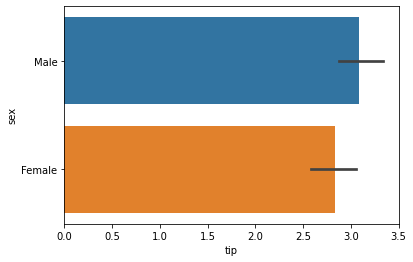

In [68]:
sns.barplot(x='tip', y='sex', data=tips)
plt.show()

In [70]:
tips.groupby(by='sex')['tip'].max()

sex
Male      10.0
Female     6.5
Name: tip, dtype: float64

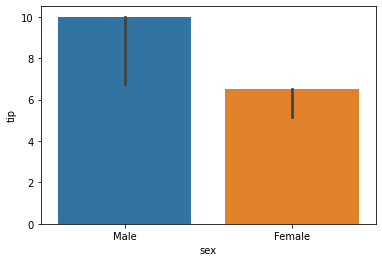

In [69]:
# 성별 tip의 최댓값
sns.barplot(x='sex', y='tip', data=tips, estimator=np.max) # np.max 콜백이라 나중에 호출되는 함수
plt.show()

In [72]:
# 요일별, 성별 tip의 평균
tips.groupby(by=['day', 'sex'])['tip'].mean()

day   sex   
Thur  Male      2.980333
      Female    2.575625
Fri   Male      2.693000
      Female    2.781111
Sat   Male      3.083898
      Female    2.801786
Sun   Male      3.220345
      Female    3.367222
Name: tip, dtype: float64

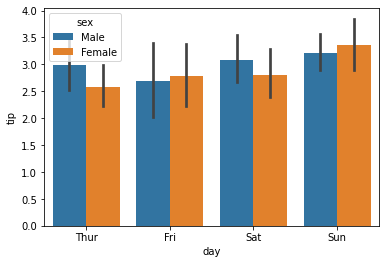

In [74]:
sns.barplot(x='day', y='tip', hue='sex', data=tips)
plt.show()

In [75]:
tips.groupby(by=['sex', 'day'])['tip'].mean()

sex     day 
Male    Thur    2.980333
        Fri     2.693000
        Sat     3.083898
        Sun     3.220345
Female  Thur    2.575625
        Fri     2.781111
        Sat     2.801786
        Sun     3.367222
Name: tip, dtype: float64

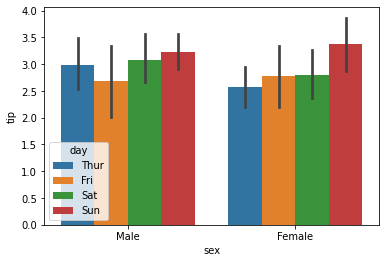

In [76]:
sns.barplot(x='sex', y='tip', hue='day', data=tips)
plt.show()